# De Prijs van Eten: Voedselprijzen door de tijd en continenten

Student names: Liam Boesten (15819965), Diaz Wiersma (15379078), Thomas Driesen (15831876), Kars Koopmanschap (15691241)

Team number: 19

## Introductie

Voedsel is volgens 162 landen een mensenrecht, maar voor miljoenen mensen wordt het steeds moeilijker om betaalbaar eten te vinden (Sonntag, n.d.). Met dit data story project wordt er geprobeerd een beeld te schetsen van twee verschillende perspectieven op de maatregelen rond voedselprijzen.

Het eerste perspectief benadrukt dat voor lage-inkomensgezinnen en arme landen de stijgende voedselprijzen een acute crisis vormen. Overheden zouden daarom meer moeten doen om voedselprijzen te reguleren en voedselzekerheid te garanderen, omdat prijsstijgingen vooral kwetsbare groepen hard raken en hun toegang tot voldoende voedsel in gevaar brengen (FAO, 2022; Save the Children, 2023; World Bank, 2021).

Het tweede perspectief stelt dat markteconomieën veerkrachtig zijn. Prijsfluctuaties worden vaak gecompenseerd door seizoenspatronen en internationale handel. Overheidsinterventies kunnen soms juist marktverstoring en inefficiënties veroorzaken, waardoor op lange termijn de voedselvoorziening kan worden belemmerd (IMF, 2021; OECD, 2020; World Trade Organization, 2019).

Met heldere data-visualisaties willen we inzicht geven in het complexe samenspel tussen marktwerking en overheidsbeleid. Het doel is niet om één oplossing te kiezen, maar om te begrijpen wat de effecten zijn van verschillende benaderingen op verschillende bevolkingsgroepen.



## Dataset en Preprocessing

Allereerst besloten we om samen twee datasets te vinden die voldoende data bevatten om twee perspectieven binnen het thema "eten en drinken" te kunnen beargumenteren. Tijdens het eerste teamoverleg bespraken we beide datasets en onderzochten we mogelijke verbanden tussen de variabelen. Uiteindelijk kozen we voor de datasets *Global Food Price Inflation* en *Consumer prices and average prices of food, 1800 - 2018*, omdat deze samen een goed inzicht geven in voedselprijzen door de tijd heen en in verschillende landen. Na enkele brainstormsessies besloten we ons te richten op de stijgende voedselprijzen, omdat deze datasets voldoende variabelen bevatten om twee verschillende perspectieven te onderzoeken: overheidsingrijpen versus vrije marktwerking.



### Cleaning
Allereerst zijn de ruwe prijsgegevens samengevoegd. Per rij is het gemiddelde genomen van de verschillende prijswaarden. Dit gemiddelde is opgeslagen in een nieuwe kolom, genaamd mean_price, zodat er één duidelijke prijs per rij is. De datums zijn correct ingelezen en aangepast, zodat het jaar eruit gehaald kon worden. Dit was nodig voor tijdsanalyses.

Daarna is de dataset samengevat: per land en per jaar is het gemiddelde van de voedselprijzen berekend. Hierdoor wordt het makkelijker om langetermijntrends te herkennen, doordat dagelijkse schommelingen worden weggefilterd. Ontbrekende jaargemiddelden zijn aangevuld met de laatst bekende waarde (voorwaartse invulling), zodat de gegevensreeksen per land compleet blijven.

Vervolgens is de procentuele verandering per jaar berekend. Hiermee wordt duidelijk hoe sterk de voedselprijzen per land elk jaar stijgen of dalen. Deze stap maakt het mogelijk om inflatietrends tussen landen en jaren goed met elkaar te vergelijken.

Naast het bekijken van de jaarlijkse prijsstijgingen is ook gekeken naar volatiliteit, oftewel hoe sterk de voedselprijzen schommelen. Eerst is per land en per maand het gemiddelde van de voedselprijs berekend. Deze maandgemiddelden zijn vervolgens per jaar samengevoegd om de standaarddeviatie (spreiding) te bepalen. Dit laat zien hoeveel de prijzen per land en per jaar fluctueren. De resultaten zijn weergegeven in een heatmap, waarbij warmere kleuren wijzen op grotere schommelingen.

Ten slotte is ook de gemiddelde jaarlijkse inflatie per land berekend, op basis van de procentuele verandering in voedselprijzen. Zo wordt zichtbaar welke landen over de jaren heen gemiddeld de hoogste of laagste prijsstijging hebben gehad. Deze gemiddelden zijn gevisualiseerd in een horizontale staafgrafiek, waarbij rode balken stijgende prijzen tonen en blauwe balken stabiele of dalende prijzen.

## Overheidsingrijpen

Voor lage-inkomensgezinnen vormen stijgende voedselprijzen een directe bedreiging. Omdat zij vaak het grootste deel van hun inkomen aan voedsel besteden, leiden prijsstijgingen snel tot onzekerheid over toegang tot basisvoedsel. Dit vergroot niet alleen het risico op ondervoeding en gezondheidsproblemen, maar versterkt ook bestaande sociale ongelijkheden. Daarom moeten overheden dringend effectievere maatregelen nemen om voedselinflatie tegen te gaan en voedselzekerheid voor kwetsbare groepen te waarborgen.

### Prijzen schommelen sterk, en dat verschilt per land

In de heatmap hieronder is te zien hoe sterk de voedselprijzen van jaar tot jaar fluctueren. Deze volatiliteit is een maat voor hoe onvoorspelbaar prijzen zijn. Landen met donkere roodtinten kenden grote schommelingen in de voedselprijzen. Zulke prijsschokken worden vaak veroorzaakt door externe factoren zoals mislukte oogsten, oorlog of verstoringen in wereldwijde toeleveringsketens (“The State of Food Security and Nutrition in the World 2024,” 2024).

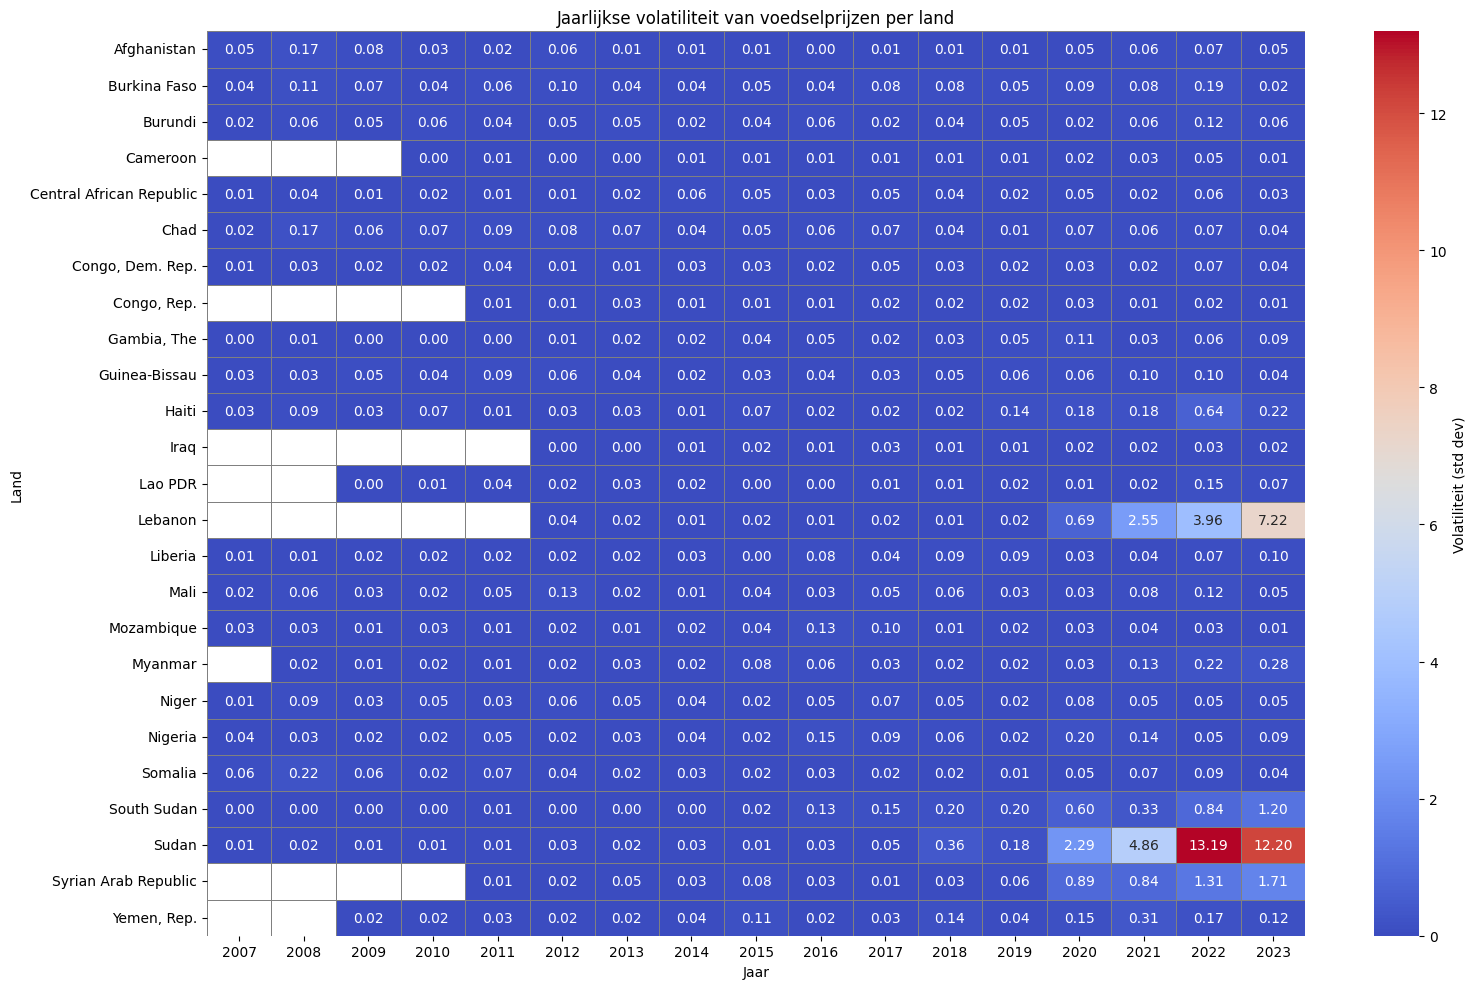

In [58]:
# Bereken maandelijkse gemiddelde prijs per land
df['month'] = df['date'].dt.to_period('M')
maand_prijs = df.groupby(['country', 'month'])['mean_price'].mean().reset_index()

# Zet 'month' om naar datetime (eerste dag van maand)
maand_prijs['month'] = maand_prijs['month'].dt.to_timestamp()

# Jaar uit maand halen
maand_prijs['year'] = maand_prijs['month'].dt.year

# Volatiliteit (std dev) per land per jaar berekenen
volatiliteit = maand_prijs.groupby(['country', 'year'])['mean_price'].std().reset_index()

# Pivot voor plot
pivot_vol = volatiliteit.pivot(index='country', columns='year', values='mean_price')

# Plot heatmap volatiliteit
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot_vol,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Volatiliteit (std dev)'},
    annot=True,
    fmt=".2f"
)
plt.title('Jaarlijkse volatiliteit van voedselprijzen per land')
plt.xlabel('Jaar')
plt.ylabel('Land')
plt.tight_layout()
plt.show()


> *Figuur 1: Overzicht volatiliteit voedselprijzen per land en jaar*

In een vrije markt reageren prijzen direct op zulke schokken: als het aanbod daalt, stijgen de prijzen. Zonder overheidsmaatregelen kunnen die prijsstijgingen snel uit de hand lopen, zeker bij producten waar mensen niet zonder kunnen.

> *Figure 2: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante.

### De inflatie treft niet iedereen even hard

In de grafiek hieronder zie je de gemiddelde jaarlijkse inflatie in voedselprijzen per land. Elk land wordt weergegeven met een horizontale balk: hoe verder naar rechts, hoe hoger de gemiddelde prijsstijging. Landen met een hoge inflatie zijn vaak ook landen waar veel mensen een groot deel van hun inkomen aan voedsel besteden.





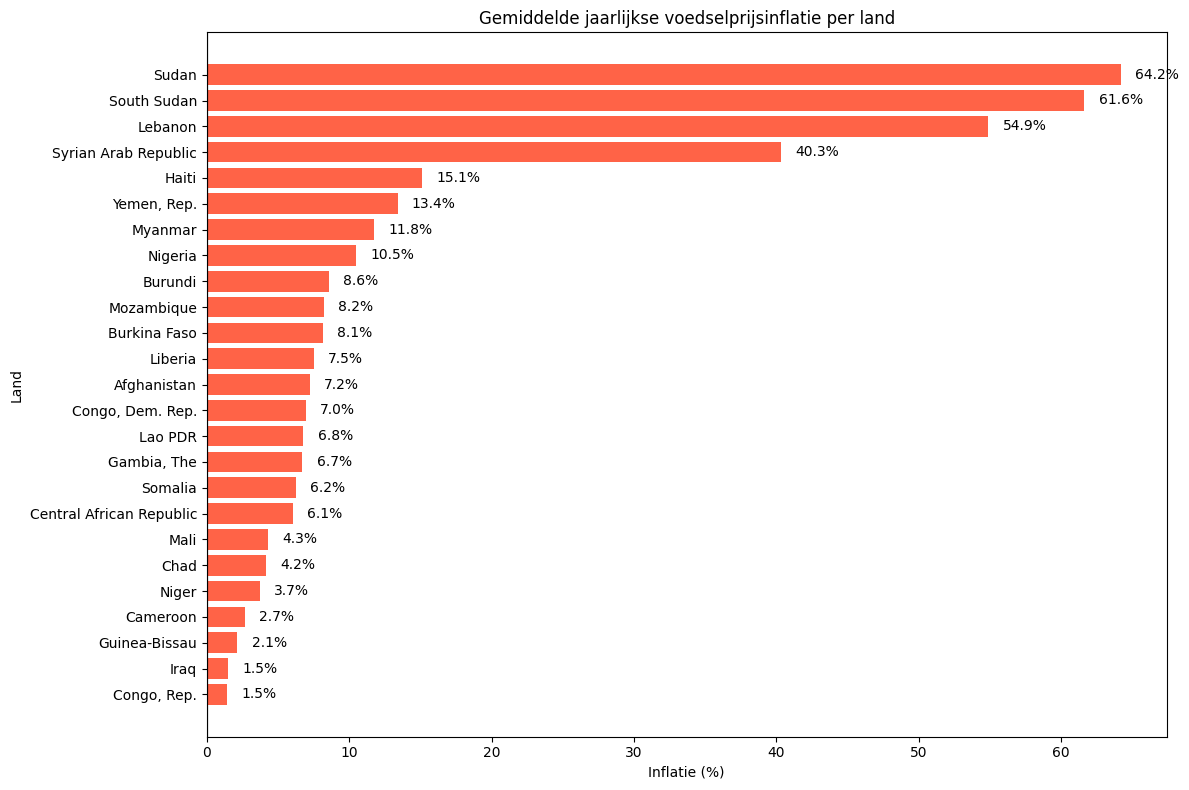

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data inladen
inflatie = pd.read_csv("WLD_RTFP_country_2023-10-02.csv", low_memory=False)

# Datum omzetten
inflatie['date'] = pd.to_datetime(inflatie['date'])

# Jaar extraheren (staat er al, maar voor zekerheid)
inflatie['year'] = inflatie['date'].dt.year

# Prijs kolom kiezen
prijs_kolom = 'Close'  # slotprijs als proxy voor voedselprijs

# Gemiddelde prijs per land per jaar
jaarprijs = inflatie.groupby(['country', 'year'])[prijs_kolom].mean().reset_index()

# Vul ontbrekende prijswaarden eerst op (optioneel, afhankelijk van je data)
jaarprijs[prijs_kolom] = jaarprijs.groupby('country')[prijs_kolom].transform(lambda x: x.ffill())

# Jaarlijkse inflatie berekenen zonder fill_method-warning
jaarprijs['inflatie'] = jaarprijs.groupby('country')[prijs_kolom].pct_change(fill_method=None) * 100

# Verwijder eerste NaN per land (kan niet berekend worden)
inflatie_long = jaarprijs.dropna(subset=['inflatie']).reset_index(drop=True)

# Gemiddelde inflatie per land over jaren
gem_inflatie = inflatie_long.groupby('country')['inflatie'].mean().reset_index()

# Sorteren voor grafiek
gem_inflatie = gem_inflatie.sort_values('inflatie', ascending=True)

# Kleur: rood voor positieve inflatie, blauw anders
colors = np.where(gem_inflatie['inflatie'] > 0, 'tomato', 'steelblue')

# Plotten
plt.figure(figsize=(12,8))
bars = plt.barh(gem_inflatie['country'], gem_inflatie['inflatie'], color=colors)
plt.axvline(0, color='black', linewidth=0.8)

plt.title('Gemiddelde jaarlijkse voedselprijsinflatie per land')
plt.xlabel('Inflatie (%)')
plt.ylabel('Land')

# Waarden naast balken
for bar in bars:
    width = bar.get_width()
    plt.text(width + (1 if width > 0 else -5), bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center', ha='left' if width > 0 else 'right')

plt.tight_layout()
plt.show()


> *Figure 3: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Stijgende voedselprijzen raken dus niet iedereen even hard. In rijke huishoudens is voedsel een klein deel van het budget. In arme gezinnen is dat vaak meer dan 50%. Inflatie vergroot zo de ongelijkheid. Zonder ingrijpen riskeren we dat basisvoeding onbetaalbaar wordt voor een groeiende groep mensen.

## Your Second Perspective

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu.

### The First Argument of Your Second Perspective

Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc.

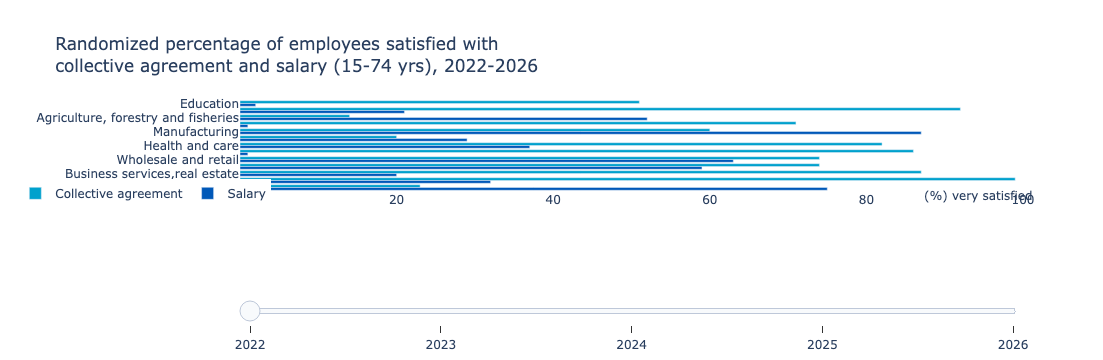

In [25]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming you have df3 as your original DataFrame
# Create a new DataFrame for random data
df4 = df3.copy()
# Set a random seed for reproducibility
np.random.seed(42)

# Add random data for years 2022-2026
for year in range(2022, 2027):
    for var, _ in variables:
        df4[var + " " + str(year)] = np.random.randint(0, 100, df4.shape[0])

# Create an empty figure
fig4 = go.Figure()

# Initialize a list to hold the trace names
trace_names = []

# Loop over the variables to add a trace for each one
for var, color in variables:
    for year in range(2022, 2027):
        name = var.split("(")[0].strip()
        trace_name = f"{name} {year}"
        fig4.add_trace(go.Bar(
            y=df4["Bedrijfstak"],
            x=df4[var + " " + str(year)],
            name=name,
            orientation='h',
            hovertemplate=f'%{{y}}<br>{name}: <b>%{{x}}% (very) satisfied</b><extra></extra>',
            marker_color=color,
            legendgroup=name,  # Add a legend group for each variable
            visible = year == 2022
        ))
        trace_names.append(trace_name)

# Add slider steps
steps = []
for i, year in enumerate(range(2022, 2027)):
    step = dict(
        method="update",
        args=[{"visible": [name.endswith(str(year)) for name in trace_names]},  # Show only the traces ending with the current year
              {"title": f"Randomized percentage of employees satisfied with collective agreement and salary<br>(15-74 yrs), {year}"}],
        label=str(year)
    )
    steps.append(step)

# Customize the plot layout
fig4.update_layout(
    plot_bgcolor='white',
    title="Randomized percentage of employees satisfied with<br>collective agreement and salary (15-74 yrs), 2022-2026",
    xaxis=dict(title='', title_standoff=10, automargin=True, range=[0, 100]),  
    yaxis=dict(title='', autorange="reversed", automargin=True),
    legend=dict(title='', orientation='h', yanchor='bottom', y=-0.185, xanchor='right', x=0.04),
    barmode='group',
    annotations=[dict(x=1.015, y=-0.15, xref='paper', yref='paper', showarrow=False, text="(%) very satisfied")],
    sliders=[dict(
        active=0,
        pad={"t": 110},  # Increase top padding for the slider to move it further down
        len=1,  # Adjust the length of the slider
        steps=steps,
        currentvalue={"visible": False}
    )],
    height=700
)

# Show the plot
fig4.show()

> *Figure 4: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur?

### The Second Argument of Your Second Perspective

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.

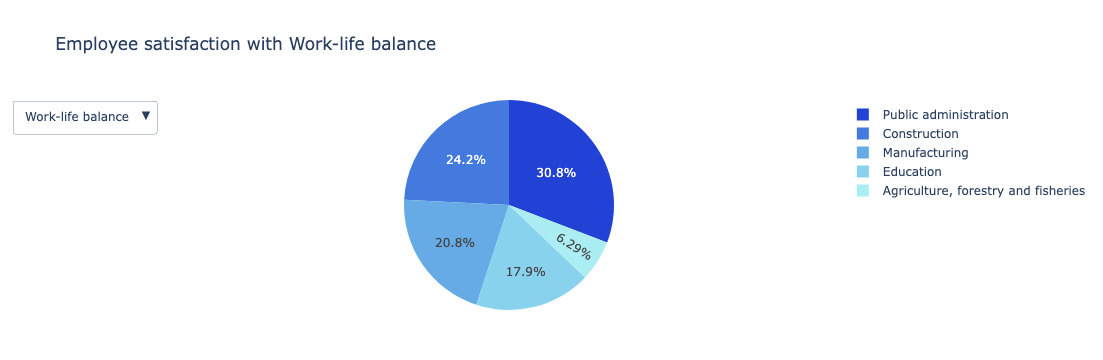

In [30]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.colors as colors

# Set a random seed for reproducibility
np.random.seed(42)

# Create a new DataFrame for random data
df5 = df3[df3['Bedrijfstak'].isin(df3['Bedrijfstak'].unique()[:5])].copy()

# Define new variables and add random data for each one
new_variables = ["Work-life balance", "Job security", "Company culture"]
for var in new_variables:
    df5[var] = np.random.randint(6, 100, df5.shape[0])  # generate random integers from 6 to 100

# Initialize an empty figure
fig5 = go.Figure()

# Add a pie chart for each variable
for var in new_variables:
    fig5.add_trace(go.Pie(
        labels=df5["Bedrijfstak"],
        values=df5[var],
        name=var,
        hovertemplate=f'{var}: <b>%{{value}}% (very) satisfied</b><extra></extra>',
    ))

# Only display the first pie chart initially
for i in range(1, len(fig5.data)):
    fig5.data[i].visible = False

# Create a dropdown menu
dropdown = [{"label": var, "method": "update",
             "args": [{"visible": [j == i for j in range(len(new_variables))]},
                      {"title": f"Employee satisfaction with {var}"}]}
            for i, var in enumerate(new_variables)]


# Define a custom color scale
custom_colorscale = [
    '#2241D5',
    '#447ADE',
    '#66ABE6',
    '#88D2ED',
    '#AAEEF3'
]

# Customize the plot layout
fig5.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            buttons=dropdown,
            direction="down",
            showactive=True
        ),
    ],
    title="Employee satisfaction with Work-life balance",
    title_x=0.05,  # move the title to the left
    colorway=custom_colorscale,  # set the blue color scale
    height=500,  # set the height of the plot
    margin=dict(l=50, r=50, t=100, b=50),  # adjust the margins for proper spacing
    xaxis=dict(domain=[0, 0.45]),  # adjust the x-axis position
    yaxis=dict(domain=[0.2, 1.0])  # adjust the y-axis position
)

# Show the plot
fig5.show()

> *Figure 5: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

> *Figure 6: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

## Reflection

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## Work Distribution

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## References

Centraal Bureau voor de Statistiek. (2023). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022

## Appendix

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Tabel 1: Gebruik van Generatieve AI om dit document te creëren.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data inladen
df = pd.read_csv("WLD_RTFP_country_2023-10-02.csv", parse_dates=['date'])

# Gemiddelde voedselprijs per rij berekenen
df['mean_price'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

# Jaar uit datum halen
df['year'] = df['date'].dt.year

# Jaarlijkse gemiddelde voedselprijs per land berekenen
jaar_prijs = df.groupby(['country', 'year'])['mean_price'].mean().reset_index()

# Pivot zodat landen rijen zijn en jaren kolommen
pivot = jaar_prijs.pivot(index='country', columns='year', values='mean_price')

# NA's vullen met laatste beschikbare waarde (forward fill)
pivot_filled = pivot.ffill(axis=1)

# Procentuele verandering berekenen (inflatie) per land per jaar, fill_method=None om warning te voorkomen
inflatie = pivot_filled.pct_change(axis=1, fill_method=None) * 100

# Heatmap plotten
plt.figure(figsize=(16, 10))
sns.heatmap(
    inflatie,
    cmap='RdYlGn_r',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Inflatie (%)'},
    annot=True,
    fmt=".1f"
)
plt.title('Jaarlijkse voedselprijsinflatie per land (%)')
plt.xlabel('Jaar')
plt.ylabel('Land')
plt.tight_layout()
plt.show()
